In [72]:
from plotly import __version__
#from plotly.offline import download_plotlyjs, init_notebook_mode
#from plotly.offline import iplot as iplot_offline
#from plotly.offline import plot
from plotly.plotly import iplot, plot
from plotly.graph_objs import Scatter
#init_notebook_mode() # run at the start of every ipython notebook to use plotly.offline
                     # this injects the plotly.js source files into the notebook

%matplotlib inline
import matplotlib as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

In [237]:
TBP_colors = {
    'orange': 'rgba(236,159,76,0.8)',
    'dark_orange': '#e8800f',
    'gray': '#e6e6e6',
    'light gray': '#f2f2f2',
    'teal': '#b2e3dd',
}

In [150]:
cf.go_online()

In [23]:
dtypes=[str,datetime.date,int,int,int,int]
threemonth_metrics = pd.read_csv("raw_data/three-month-export_2016-04-04.csv",parse_dates=[1])
threemonth_metrics.head()

,item_title,release_date,downloads__april,downloads__march,downloads__february,downloads__total
0,TBP50 - Not Giving a Good Got Damn,2016-04-04 10:24:41,114,0,0,114
1,TBP49 - Welterweight Gold,2016-03-31 10:47:53,330,253,0,583
2,"TBP48 - Inertia, My Friend!",2016-03-27 18:30:33,27,460,0,487
3,TBP47 - Bottoms Up 4,2016-03-20 05:09:56,13,399,0,412
4,TBP46 - The Fundamental Conflict,2016-03-13 19:10:34,10,637,0,647


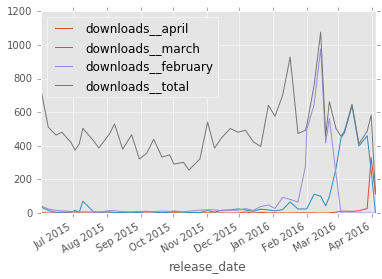

In [4]:
threemonth_metrics.plot(x='release_date')

In [194]:
daily_metrics = pd.DataFrame.from_csv("raw_data/daily-totals_2016-07-03.csv", index_col=None, parse_dates=[0])
daily_metrics_Jun12 = pd.DataFrame.from_csv("raw_data/daily-totals_2016-06-12.csv", index_col=None, parse_dates=[0])
daily_metrics_May29 = pd.DataFrame.from_csv("raw_data/daily-totals_2016-05-29.csv", index_col=None, parse_dates=[0])
daily_metrics_May04 = pd.DataFrame.from_csv("raw_data/daily-totals_2016-05-04.csv", index_col=None, parse_dates=[0])
daily_metrics_Apr24 = pd.DataFrame.from_csv("raw_data/daily-totals_2016-04-24.csv", index_col=None, parse_dates=[0])
daily_metrics_Apr17 = pd.DataFrame.from_csv("raw_data/daily-totals_2016-04-17.csv", index_col=None, parse_dates=[0])
daily_metrics_Apr12 = pd.DataFrame.from_csv("raw_data/daily-totals_2016-04-12.csv", index_col=None, parse_dates=[0])
daily_metrics_Apr04 = pd.DataFrame.from_csv("raw_data/daily-totals_2016-04-04.csv", index_col=None, parse_dates=[0])

In [195]:
update_string = ' (updated July 3, 2016)'

In [196]:
dates = daily_metrics.date
dates = pd.to_datetime(dates)
start = dates[0]
periods = dates - start
periods_days = periods / np.timedelta64(1, 'D')

In [197]:
daily = daily_metrics.set_index('date')
weekly = daily.resample('W').sum()
monthly = daily.resample('M').sum()
daily_Jun12 = daily_metrics_Jun12.set_index('date')
weekly_Jun12 = daily_Jun12.resample('W').sum()
monthly_Jun12 = daily_Jun12.resample('M').sum()
daily_May29 = daily_metrics_May29.set_index('date')
weekly_May29 = daily_May29.resample('W').sum()
monthly_May29 = daily_May29.resample('M').sum()
daily_May04 = daily_metrics_May04.set_index('date')
weekly_May04 = daily_May04.resample('W').sum()
monthly_May04 = daily_May04.resample('M').sum()
daily_Apr24 = daily_metrics_Apr24.set_index('date')
monthly_Apr24 = daily_Apr24.resample('M').sum()
daily_Apr17 = daily_metrics_Apr17.set_index('date')
monthly_Apr17 = daily_Apr17.resample('M').sum()
daily_Apr12 = daily_metrics_Apr12.set_index('date')
monthly_Apr12 = daily_Apr12.resample('M').sum()
daily_Apr04 = daily_metrics_Apr04.set_index('date')
monthly_Apr04 = daily_Apr04.resample('M').sum()

In [198]:
# Get Dataframe of release dates
episodes = pd.DataFrame.from_csv('/Users/coreypetty/PycharmProjects/TBP_metrics/raw_data/three-month-export_2016-07-03.csv', 
                                            index_col=None, parse_dates=['release_date'])
episodes = episodes[['release_date','item_title','downloads__total']]
episodes.columns = ['release_date','title', 'downloads']
release_dates = list(episodes.release_date)

In [11]:
import matplotlib.dates as mdates
from scipy.optimize import curve_fit
def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c

x = periods_days
y = daily_metrics.total_downloads
popt, pcov = curve_fit(exponenial_func, x, y, p0=(1, 1e-6, 1))
print("a= {}, b={}, c={}".format(*popt))

xx = np.linspace(1, 400, 1000)
yy = exponenial_func(xx, *popt)



trace = go.Scatter(
    x=x, 
    y=daily_metrics.total_downloads,
    name='Daily downloads',
)
trace2 = go.Scatter(
                  x=xx, 
                  y=yy, 
                  mode='lines',
                  marker=go.Marker(color='rgb(31, 119, 180)'),
                  name='Fit'
                  )

annotation = go.Annotation(
                  x=200,
                  y=400,
                  text='$\\textbf{Fit}: 7.56e^{-0.0093x} - 34.91$',
                  showarrow=False
                  )
data = [trace, trace2]
layout = go.Layout(
    title="The Bitcoin Podcast daily downloads (updated June 26, 2016)",
    xaxis=go.XAxis(
        title='Date',
    ),
    yaxis=go.YAxis(
        title='Number of downloads',
    ),
#     shapes=shape_data,
    annotations=[annotation],
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename="TBP_plots/daily_downloads-exp_fit")

a= 8.425606882778093, b=-0.009049184070826458, c=33.17762408514325


In [240]:
trace = go.Scatter(
    x=daily_metrics.date, 
    y=daily_metrics.total_downloads,
    marker = {
        'color': TBP_colors['orange'],
    }
)

# Get ymax from total_downloads
ymax = daily_metrics.total_downloads.max()

# Make function to fill in shape data
def make_shape_data(release_date, ymax):
    return {
        'type': 'line',
        'x0': release_date,
        'y0': 0,
        'x1': release_date,
        'y1': ymax,
        'line': {
                'color': '#2e2e2e',
                'width': 1,
                'dash': 'dash'
                },
        'opacity': 0.1,
        }
# Make lines shape data for each release date
shape_data = []
for release_date in release_dates:
    shape_data.append(make_shape_data(release_date, ymax))

layout = {
    'title': "Daily downloads" + update_string,
    'xaxis': {
        'gridcolor': '#f2f2f2',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Total downloads',
        'gridcolor': '#f2f2f2',
        'zeroline': False,
    },
    'shapes': shape_data,
    'paper_bgcolor': '#f2f2f2',
    'plot_bgcolor': '#d7d8d8',
    'font': dict(family='Helvetica, sans-serif', size=16, color='#2e2e2e'),
}

data = [trace]
fig = {
    'data': data,
    'layout': layout,
}
#iplot_offline(fig) # offline
py.iplot(fig, filename='TBP_plots/daily_total-downloads') # update online

In [200]:
bar_week = go.Bar(
    x = weekly.index,
    y = weekly.total_downloads,
    marker=dict(
        color=TBP_colors['orange'],
        line=dict(
            color='#e8800f',
            width=1.5,
        )
    ),
    opacity=0.8
)

layout = go.Layout(
    title = 'Weekly Downloads' + update_string,
    yaxis = dict(
        title = 'Total downloads',
        gridcolor='#f2f2f2',
#         zerolinecolor='#969696',
#         showline=True,
    ),
    xaxis = dict(
#         zerolinecolor='#969696'
        gridcolor='#f2f2f2',
#         tickangle=45,
    ),
    paper_bgcolor='#f2f2f2',
    plot_bgcolor='#d7d8d8',
    font=dict(family='Helvetica, sans-serif', size=16, color='#2e2e2e'),
    width=1200,
)
fig = dict(data=[bar_week], layout=layout)
#iplot_offline(fig)
iplot(fig, filename='TBP_plots/downloads-weekly')

In [202]:
#  Sort and plot by month
months={0:"January", 1:"February", 2:"March", 3:"April", 45:"May", 46:"May ", 55:"June", 56: "June ", 65:"July", 66:"July ", 7:"August", 8:"September", 9:"October", 10:"November", 11:"December"}
years={5:"2015", 6:"2016"}
#  Relabel to month name
ts = pd.DataFrame(monthly).set_index(pd.Series([45,55,65,7,8,9,10,0,1,2,3,46,56,66]).apply(lambda x: months[x]))
#  Plot

bar_month = go.Bar(
    x = ts.index,
    y = ts.total_downloads,
    marker=dict(
        color=TBP_colors['orange'],
        line=dict(
            color='#e8800f',
            width=1.5,
        )
    ),
    opacity=0.8
)

layout = go.Layout(
    title = 'Monthly Downloads' + update_string,
    yaxis = dict(
        title = 'Total downloads',
        gridcolor='#f2f2f2',
#         zerolinecolor='#969696',
#         showline=True,
    ),
    xaxis = dict(
#         zerolinecolor='#969696'
        gridcolor='#f2f2f2',
#         tickangle=45,
    ),
    paper_bgcolor='#f2f2f2',
    plot_bgcolor='#d7d8d8',
    font=dict(family='Helvetica, sans-serif', size=16, color='#2e2e2e'),
    width=1200,
)
fig = dict(data=[bar_month], layout=layout)
#iplot_offline(fig)
iplot(fig, filename='TBP_plots/downloads-monthly')

In [203]:
episodes = episodes.sort_values(by='release_date')

In [204]:
barh_episodes = go.Bar(
    x = episodes.downloads,
    y = episodes.title,
    marker=dict(
        color=TBP_colors['orange'],
        line=dict(
            color='#e8800f',
            width=1.5,
        )
    ),
    opacity=0.8,
    orientation = 'h'
)

layout = go.Layout(
    title='Downloads by Episode' + update_string,
    margin=go.Margin(
        l=350,
        r=30,
        b=30,
        t=50,
        pad=4
    ),
    yaxis = dict(
#         title = 'Total downloads',
        gridcolor='#f2f2f2',
#         zerolinecolor='#969696',
#         showline=True,
    ),
    xaxis = dict(
#         zerolinecolor='#969696'
        gridcolor='#f2f2f2',
#         tickangle=45,
    ),
    paper_bgcolor='#f2f2f2',
    plot_bgcolor='#d7d8d8',
    font=dict(family='Helvetica, sans-serif', size=16, color='#2e2e2e'),
    width=1200,
)
fig = dict(data=[barh_episodes], layout=layout)
#iplot_offline(fig)
iplot(fig, filename='TBP_plots/Downloads by Episode')

In [74]:
cf.go_online()

In [228]:
days_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_wkdays = daily
df_wkdays['weekday'] = df_wkdays.reset_index().date.dt.dayofweek.values
df_wkdays = df_wkdays.reset_index().pivot(index='date', columns='weekday', values='total_downloads')
df_wkdays.columns = days_of_week.values()

In [239]:
traces = []

for xd, yd in df_wkdays.iteritems():
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            pointpos=0,
            jitter=0.7,
#             whiskerwidth=0.2,
            fillcolor=TBP_colors['orange'],
            marker=dict(
                size=3,
                color=TBP_colors['dark_orange'],
            ),
            line=dict(
                width=1,
                color=TBP_colors['dark_orange'],
            ),
        ))

layout = go.Layout(
    title='Day of the Week Stats' + update_string,
    yaxis = dict(
#         title = 'Total downloads',
        gridcolor='#f2f2f2',
#         zerolinecolor='#969696',
#         showline=True,
        zeroline=False,
    ),
    xaxis = dict(
#         zerolinecolor='#969696'
        gridcolor='#f2f2f2',
        zeroline=False,
#         tickangle=45,
    ),
    paper_bgcolor='#f2f2f2',
    plot_bgcolor='#d7d8d8',
    font=dict(family='Helvetica, sans-serif', size=16, color='#2e2e2e'),
    showlegend=False,
)

fig = dict(data=traces, layout=layout)
#iplot_offline(fig)
iplot(fig, filename='TBP_plots/day_of_week_total')
